# Fitzhugh-Nagumo model: an excitable system

The Fitzhugh-Nagumo model of an excitable system is a two-dimensional simplification of the Hodgkin-Huxley model of spike generation in squid giant axons.

\begin{equation}
\begin{cases}
\frac{dv}{dt} = c(v - v^3/3 + w + I_\text{ext})\\
\tau \frac{dw}{dt} =-1/c( v - a + bw)
\end{cases}
\end{equation}

Here $I_\text{ext}$ is a stimulus current. 

We want to model the spike that is generated by a squid gian axon.

The action of an excitable neuron has the following characteristics that we knw from experiments:

- The neuron cell is initially at a resting potential value.
- If we experimentally displace the potential a little bit, it return to the resting value.
- If the perturbation is higher than a threshold value, the potential will shoot up to a very high value. In other words the spike will occur. After the spike the membrane potential will return to its resting value.

![(image from animalresearch.info](http://www.animalresearch.info/files/3314/1563/2098/Relabeled_action_potential.jpg) (image from *animalresearch.info*)

We model the fact that the neuron as a resting potential (equilibrium for the state variable $v$). Since it is a stable equilibrium, small perturbation always leads to trajectory that converge on it. Since big perturbation start the spiking, this equilibrium cannot be unique. This is the *self-excitation via a positive feedback*.

Since the long term behavior of the system is to go back to the resting potential. We need a second dimension and a recovery variable that has a slower dyamics (time scale parameter $\tau$) and bring back the system toward the resting potential ($-w$ term). The recovery variable decay ($-bw$ term). 

Moreover, electrophysiology show that imposing a moderate current to the membrane result in a periodic spiking. If the external current is too high, the spikes are blocked (Excitation block). Periodic spiking requires a third-degree polynomial form for the membrane potential. 

## Phase Diagram

In [1]:
from functools import partial
import numpy as np
import scipy.integrate
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #used to write custom legends
%matplotlib inline

In [2]:
# Implement the flow of the Fitzhugh-Nagumo model.
# And simulate some trajectories. 
# Try to use small perturbation of the resting potential as inital conditions. 

scenarios = [
     {"a":0.7, "b":0.8, "c":3, "tau":20, "I":0},
     {"a":0.7, "b":0.8, "c":3, "tau":20, "I":0.23},
     {"a":0.7, "b":0.8, "c":3, "tau":20, "I":0.5}
]
time_span = np.linspace(0, 200, num=1500)

In [3]:
def fitzhugh_nagumo(x, t, a, b, tau, I):
    """Time derivative of the Fitzhugh-Nagumo neural model.
    Args:
       x (array size 2): [Membrane potential, Recovery variable]
       a, b (float): Parameters.
       tau (float): Time scale.
       t (float): Time (Not used: autonomous system)
       I (float): Constant stimulus current. 
    Return: dx/dt (array size 2)
    """
    pass

In [4]:
def fitzhugh_nagumo(x, t, a, b, c, tau, I):
    """Time derivative of the Fitzhugh-Nagumo neural model.
    Args:
       x (array size 2): [Membrane potential, Recovery variable]
       a, b (float): Parameters.
       tau (float): Time scale.
       t (float): Time (Not used: autonomous system)
       I (float): Constant stimulus current. 
    Return: dx/dt (array size 2)
    """
    return np.array([c*(x[0] - (x[0]**3)/3 + x[1] + I), 
                     (-1/(c*tau))*(x[0] - a - b * x[1])])

In [5]:
def get_displacement(param, dmax=0.5,time_span=np.linspace(0,200, 1000), number=20):
    # We start from the resting point...
    ic = scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                                      y0=[0,0],
                                                      t= np.linspace(0,999, 1000))[-1]
    # and do some displacement of the potential. 
    traj = [] 
    for displacement in np.linspace(0,dmax, number):
        traj.append(scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                                      y0=ic+np.array([displacement,0]),
                                                      t=time_span))
    return traj

In [6]:
# Do the numerical integration.
trajectories = {} # We store the trajectories in a dictionary, it is easier to recover them. 
for i,param in enumerate(scenarios):
    trajectories[i] = get_displacement(param, number=3, time_span=time_span, dmax=0.5)

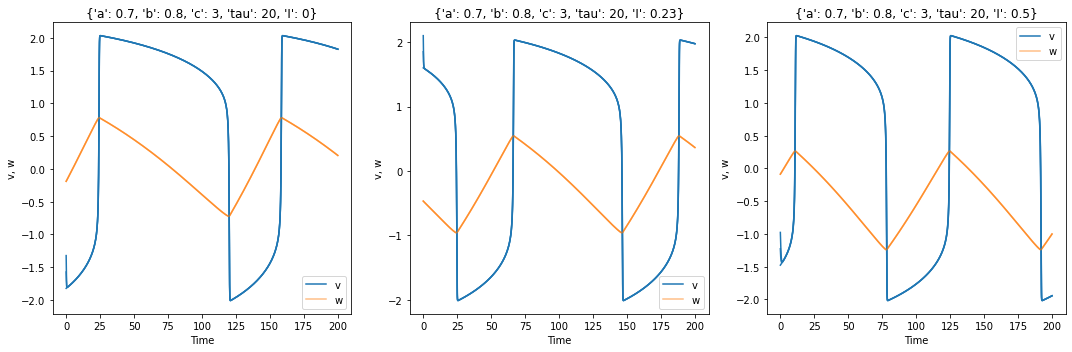

In [7]:
# Draw the trajectories. 
fig, ax = plt.subplots(1, len(scenarios), figsize=(5*len(scenarios),5))
for i,param in enumerate(scenarios):
        ax[i].set(xlabel='Time', ylabel='v, w',
                     title='{}'.format(param))
        for j in range(len(trajectories[i])):
            v = ax[i].plot(time_span,trajectories[i][j][:,0], color='C0')
            w = ax[i].plot(time_span,trajectories[i][j][:,1], color='C1', alpha=.5)
        ax[i].legend([v[0],w[0]],['v','w'])
plt.tight_layout()

### Isoclines

Isoclines zero (or null-clines) are the manifolds on which one component of the flow is null. 
Find the equation of the null-clines for $v$ and $w$. 


To find the null-isoclines, you have to solve:

\begin{equation}
\frac{dv}{dt} = 0 \Leftrightarrow w = v^3/3 -cv - I_\text{ext}
\end{equation}

For the first one and:

\begin{equation}
\frac{dw}{dt} = 0 \Leftrightarrow w = \frac{1}{b}(v-a)
\end{equation}

For the second one. 

In [8]:
# Plot the isoclines in the phase space. 

In [9]:
def plot_isocline(ax, a, b, c, tau, I, color='k', style='--', opacity=.5, vmin=-1,vmax=1):
    """Plot the null iscolines of the Fitzhugh nagumo system"""
    v = np.linspace(vmin,vmax,100)
    ax.plot(v, v**3/3 -c*v - I, style, color=color, alpha=opacity)
    ax.plot(v, (v - a)/b, style, color=color, alpha=opacity)

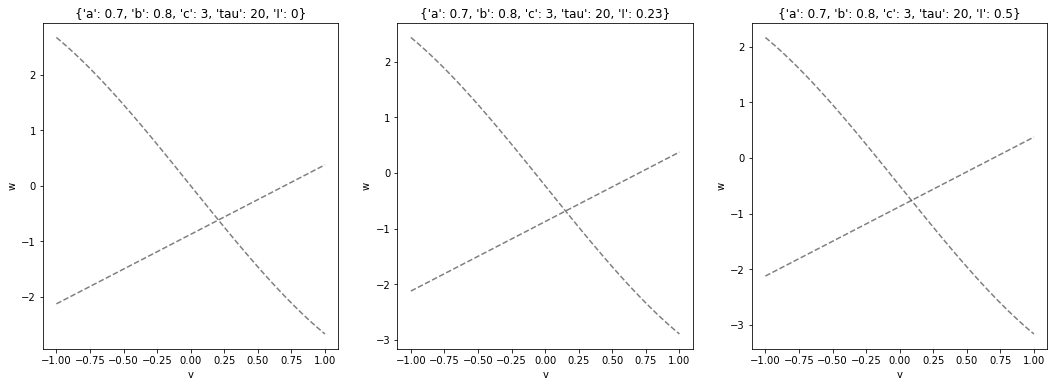

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i, sc in enumerate(scenarios):
    plot_isocline(ax[i], **sc)
    ax[i].set(xlabel='v', ylabel='w',
              title='{}'.format(sc))

### Flow

Let us plot the flow, which is the vector field defined by:

$F: \mathbb R^2 \mapsto \mathbb R^2$

$\vec F(v,w) = \begin{bmatrix}\frac{dv}{dt}(v,w)\\  \frac{dw}{dt}(v,w)\end{bmatrix}$



In [11]:
# Plot the flow using matplotlib.pyplot.streamplot. 
# On the domain w \in [-1,1] and v in [-(1+a)/b, (1-a)/b]

In [12]:
def plot_vector_field(ax, param, xrange, yrange, steps=50):
    # Compute the vector field
    x = np.linspace(xrange[0], xrange[1], steps)
    y = np.linspace(yrange[0], yrange[1], steps)
    X,Y = np.meshgrid(x,y)
    
    dx,dy = fitzhugh_nagumo([X,Y],0,**param)   
    
    # streamplot is an alternative to quiver 
    # that looks nicer when your vector filed is
    # continuous.
    ax.streamplot(X,Y,dx, dy, color=(0,0,0,.1))
    
    ax.set(xlim=(xrange[0], xrange[1]), ylim=(yrange[0], yrange[1]))

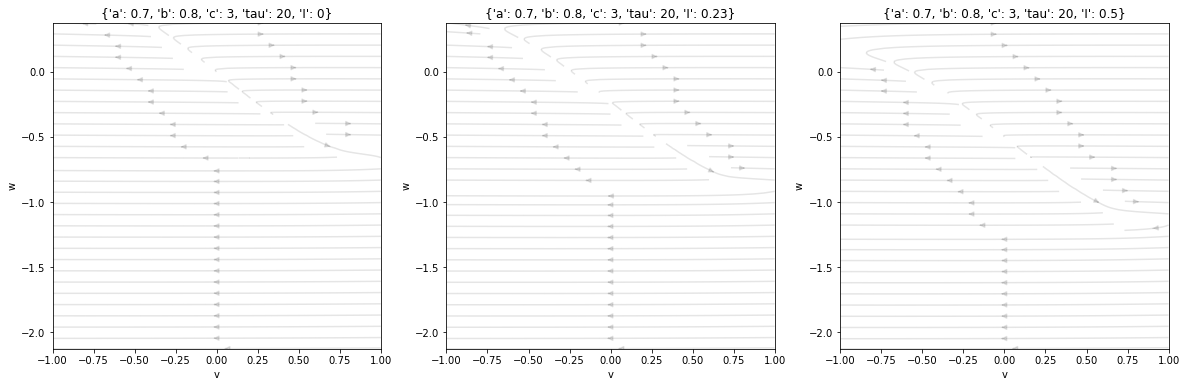

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i, sc in enumerate(scenarios):
    xrange = (-1, 1)
    yrange = [(1/sc['b'])*(x-sc['a']) for x in xrange]
    plot_vector_field(ax[i], sc, xrange, yrange)
    ax[i].set(xlabel='v', ylabel='w',
          title='{}'.format(sc))

### Equilibrium points

The equilibria are found at the crossing between the null-isocline for $v$ and the one for $w$. 

Find the polynomial equation verified by the equilibria of the model. 


\begin{equation}
f(v_*) = 0 = \frac {v_*^3}{3} + v_* \left ( \frac{1}{b} + c \right ) - I_{ext} + \frac{a}{b}
\end{equation}

\begin{equation}
w_* = \frac {v_*^3}{3} -cv_* - I_{ext} = \frac{1}{b}*(v_* - a)
\end{equation}


In [14]:
# We know that polynomial equations have at most has many roots as their degree.
# Which allow us to find all the equilibria. 

# Numerically solve this equation using the function numpy.roots. Keep only the real roots. 

In [15]:
def find_roots(a,b,c,I, tau):
    # The coeficients of the polynomial equation are:
    # 1/3           * v**3 
    # 0           * v**2 
    # - (1/b + c) * v**1 
    # (a/b - I) * v**0
    coef = [1, 0, -1/b - c, a/b - I]
    
    # We are only interested in real roots.
    # np.isreal(x) returns True only if x is real. 
    # The following line filter the list returned by np.roots
    # and only keep the real values. 
    roots = [np.real(r) for r in np.roots(coef) if np.isreal(r)]
    
    # We store the position of the equilibrium. 
    return [[r, r - r**3 + I] for r in roots]

eqnproot = {}
for i, param in enumerate(scenarios):
    eqnproot[i] = find_roots(**param)

### Nature of the equilibria 

The local nature and stability of the equilibrium is given by linearising the flow function. This is done using the Jacobian matrix of the flow:

\begin{equation}
\begin{bmatrix}
    F_1(v+h,w+k)\\F_2(v+h,w+k)
\end{bmatrix} =  
\begin{bmatrix}
    F_1(v,w)\\F_2(v,w)
\end{bmatrix} +
\begin{bmatrix}
    \frac{ \partial F_1(v,w)}{\partial v} &  \frac{ \partial F_1(v,w)}{\partial w}\\
    \frac{ \partial F_2(v,w)}{\partial v} &  \frac{ \partial F_2(v,w)}{\partial w}\\
\end{bmatrix}
\begin{bmatrix}
    h\\k
\end{bmatrix} + o \left( \left| \left| \begin{bmatrix}
    h\\k
\end{bmatrix} \right | \right | \right )
\end{equation}


\begin{equation}
J \big \rvert_{v,w} = 
\begin{bmatrix}
    \frac{ \partial F_1(v,w)}{\partial v} &  \frac{ \partial F_1(v,w)}{\partial w}\\
    \frac{ \partial F_2(v,w)}{\partial v} &  \frac{ \partial F_2(v,w)}{\partial w}\\
\end{bmatrix} = - \begin{bmatrix}
    c - c v^2  &  c \\
    -\frac{1}{c \tau}  &  -\frac{b}{c \tau}\\
\end{bmatrix}
\end{equation}

In [16]:
# Implement the jacobian of the system and use numpy.linalg.eig to determine the local topology of the equilibria. 

# You can use the following color code:
EQUILIBRIUM_COLOR = {'Stable node':'C0',
                    'Unstable node':'C1', 
                    'Saddle':'C4',
                    'Stable focus':'C3',
                    'Unstable focus':'C2',
                    'Center':'C5'}

In [17]:
def jacobian_fitznagumo(v, w, a, b, c, tau, I):
    """ Jacobian matrix of the ODE system modeling Fitzhugh-Nagumo's excitable system

    Args:
        v (float): Membrane potential
        w (float): Recovery variable
        a,b (float): Parameters
        tau (float): Recovery timescale.
    Return: np.array 2x2"""

In [18]:
def jacobian_fitznagumo(v, w, a, b, c, tau, I):
    """ Jacobian matrix of the ODE system modeling Fitzhugh-Nagumo's excitable system
    Args
    ====
        v (float): Membrane potential
        w (float): Recovery variable
        a,b (float): Parameters
        tau (float): Recovery timescale.
    Return: np.array 2x2"""
    return np.array([[- c * v**2 + c , c],
                       [-1/(c*tau), -b/(c*tau)]])

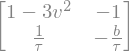

In [21]:
# Symbolic computation of the Jacobian using sympy... 
import sympy 
sympy.init_printing()
c=1

# Define variable as symbols for sympy
v, w = sympy.symbols("v, w")
a, b, tau, I = sympy.symbols("a, b, tau, I")

# Symbolic expression of the system
dvdt = c*(v - v**3 - w + I)
dwdt = (v - a - b * w)/tau

# Symbolic expression of the matrix
sys = sympy.Matrix([dvdt, dwdt])
var = sympy.Matrix([v, w])
jac = sys.jacobian(var)

# You can convert jac to a function:
jacobian_fitznagumo_symbolic = sympy.lambdify((v, w, a, b, tau, I), jac, dummify=False)

#jacobian_fitznagumo = jacobian_fitznagumo_symbolic
jac

In [22]:
def stability(jacobian):
    """ Stability of the equilibrium given its associated 2x2 jacobian matrix. 
    Use the eigenvalues. 
    Args:
        jacobian (np.array 2x2): the jacobian matrix at the equilibrium point.
    Return:
        (string) status of equilibrium point.
    """
    
    eigv = np.linalg.eigvals(jacobian)
    
    
    if all(np.real(eigv)==0) and all(np.imag(eigv)!=0):
        nature = "Center" 
    elif np.real(eigv)[0]*np.real(eigv)[1]<0:
        nature = "Saddle"
    else: 
        stability = 'Unstable' if all(np.real(eigv)>0) else 'Stable'
        nature = stability + (' focus' if all(np.imag(eigv)!=0) else ' node')
    return nature

def stability_alt(jacobian):
    """ Stability of the equilibrium given its associated 2x2 jacobian matrix. 
    Use the trace and determinant. 
    Args:
        jacobian (np.array 2x2): the jacobian matrix at the equilibrium point.
    Return:
        (string) status of equilibrium point.
    """
    
    determinant = np.linalg.det(jacobian)
    trace = np.matrix.trace(jacobian)
    if np.isclose(trace, 0):
        nature = "Center (Hopf)"
    elif np.isclose(determinant, 0):
        nature = "Transcritical (Saddle-Node)"
    elif determinant < 0:
        nature = "Saddle"
    else:
        nature = "Stable" if trace < 0 else "Unstable"
        nature += " focus" if (trace**2 - 4 * determinant) < 0 else " node"
    return nature

In [23]:
eqstability = {}
for i, param in enumerate(scenarios):
    eqstability[i] = []
    for e in eqnproot[i]:
        J = jacobian_fitznagumo(e[0],e[1], **param)
        eqstability[i].append(stability(J))    
eqstability

{0: ['Stable node', 'Stable node', 'Unstable node'],
 1: ['Stable node', 'Stable node', 'Unstable node'],
 2: ['Stable node', 'Stable node', 'Unstable node']}

### Complete phase diagram

In [24]:
def plot_phase_diagram(param, ax=None, title=None):
    """Plot a complete Fitzhugh-Nagumo phase Diagram in ax.
    Including isoclines, flow vector field, equilibria and their stability"""
    if ax is None:
        ax = plt.gca()
    if title is None:
        title = "Phase space, {}".format(param) 
    
    # ( ... )

In [25]:
def plot_phase_diagram(param, ax=None, title=None):
    """Plot a complete Fitzhugh-Nagumo phase Diagram in ax.
    Including isoclines, flow vector field, equilibria and their stability"""
    if ax is None:
        ax = plt.gca()
    if title is None:
        title = "Phase space, {}".format(param) 
    
    ax.set(xlabel='v', ylabel='w', title=title)
        
    # Isocline and flow... 
    xlimit = (-1.5, 1.5)
    ylimit = (-.6, .9)
    plot_vector_field(ax, param, xlimit, ylimit)
    plot_isocline(ax, **param, vmin=xlimit[0],vmax=xlimit[1])
    
    # Plot the equilibria 
    eqnproot = find_roots(**param)
    eqstability = [stability(jacobian_fitznagumo(e[0],e[1], **param)) for e in eqnproot] 
    for e,n in zip(eqnproot,eqstability):
        ax.scatter(*e, color=EQUILIBRIUM_COLOR[n])
        
        # Show a small perturbation of the stable equilibria...
        time_span = np.linspace(0, 200, num=1500)
        if n[:6] == 'Stable':
            for perturb in (0.1, 0.6):
                ic = [e[0]+abs(perturb*e[0]),e[1]]
                traj = scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                                  y0=ic,
                                                  t=time_span)
                ax.plot(traj[:,0], traj[:,1])

    # Legend
    labels = frozenset(eqstability)
    ax.legend([mpatches.Patch(color=EQUILIBRIUM_COLOR[n]) for n in labels], labels, 
           loc='lower right')

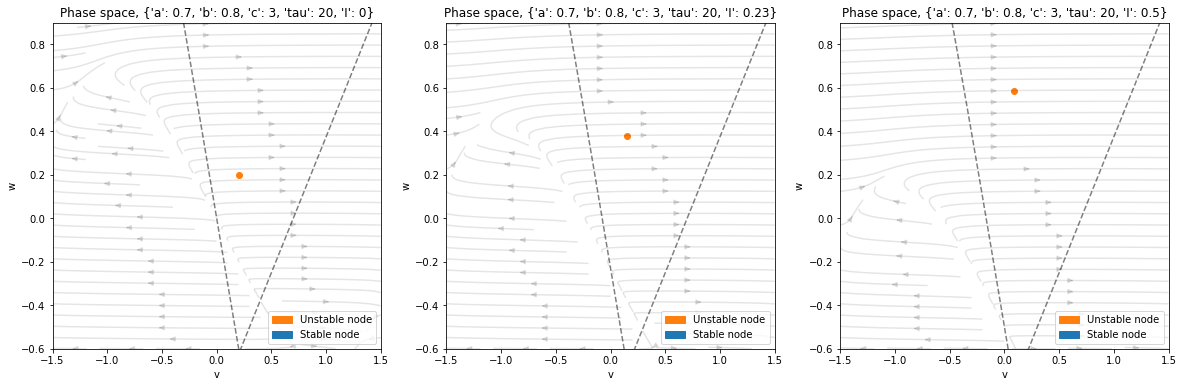

In [26]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
for i, param in enumerate(scenarios):
    plot_phase_diagram(param, ax[i])

## Bifurcation diagram

In [27]:
# Plot the bifurcation diagram for v with respect to parameter I. 

ispan = np.linspace(0,0.5,200)
bspan = np.linspace(0.6,2,200)

### Bifucation on the external stimulus I

In [28]:
I_list = []
eqs_list = []
nature_legends = []
trace = []
det = []

for I in ispan:
    param = {'I': I, 'a': -0.3, 'b': 1.4, 'tau': 20}
    roots = find_roots(**param)
    for v,w in roots:
        J = jacobian_fitznagumo(v,w, **param)
        nature = stability(J)
        nature_legends.append(nature)
        I_list.append(I)
        eqs_list.append(v)
        det.append(np.linalg.det(J))
        trace.append(J[0,0]+J[1,1])

TypeError: find_roots() missing 1 required positional argument: 'c'

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
labels = frozenset(nature_legends)
ax.scatter(I_list, eqs_list, c=[EQUILIBRIUM_COLOR[n] for n in nature_legends], s=5.9)  
ax.legend([mpatches.Patch(color=EQUILIBRIUM_COLOR[n]) for n in labels], labels, 
               loc='lower right')
ax.set(xlabel='External stimulus, $I_{ext}$', 
       ylabel='Equilibrium Membrane potential, $v^*$');

There are four bifurcations of codim 1 in this diagram: two fold bifurcation (saddle-node) and two Hopf bifurcations (stable focus-unstable focus).

In [ ]:
plt.scatter(det,trace, c=[EQUILIBRIUM_COLOR[n] for n in nature_legends])
plt.grid()
x = np.linspace(0,.2)
plt.plot(x, np.sqrt(4*x),color='k')
plt.plot(x, -np.sqrt(4*x),color='k')
plt.vlines(0, -1,1, color='k')
plt.hlines(0, -0.05,x.max(), color='k')
plt.text(-0.01, -0.5, 'Fold', rotation=90)
plt.text(0.15, 0.015, 'Hopf')

plt.gca().set(xlabel='Determinant of the Jacobian', ylabel='Trace of the Jacobian')
plt.fill_between(x,0,np.sqrt(4*x), color=EQUILIBRIUM_COLOR['Unstable focus'], alpha=0.2)
plt.fill_between(x,0,-np.sqrt(4*x), color=EQUILIBRIUM_COLOR['Stable focus'], alpha=0.2)
plt.fill_between(x,-np.sqrt(4*x),-1, color=EQUILIBRIUM_COLOR['Stable node'], alpha=0.2)
plt.fill_between(x,np.sqrt(4*x),1, color=EQUILIBRIUM_COLOR['Unstable node'], alpha=0.2)
plt.fill_between([-0.05,0],-1,1, color=EQUILIBRIUM_COLOR['Saddle'], alpha=0.2)
plt.legend([mpatches.Patch(color=EQUILIBRIUM_COLOR[n]) for n in labels], labels, 
               loc='lower right')
plt.title("Equilibrium trajectory in the jacobian's Trace/Determinant space")

### Codim 2 bifurcation on I and b

In [ ]:
# (*) Plot the codim 2 bifurcation diagram for v with respect to parameters I and b
# For each pair (I,b) indicate the number of equilibria and if the system has periodic heteroclinic behavior.

In [ ]:
def plot_displacement(param, dmax=0.5, ax1=None, ax2=None, tmax=200, number=20):
    if ax1 is None or ax2 is None:
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    # We start from the resting point...
    time_span = np.linspace(0,tmax, 1000)
    ic = scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                                      y0=[0,0],
                                                      t=time_span)[-1]

    # and do some displacement of the potential. 
    plot_phase_diagram(param, ax=ax2) 
    for displacement in np.linspace(0,dmax, number):
        traj = scipy.integrate.odeint(partial(fitzhugh_nagumo, **param),
                                                      y0=ic+np.array([displacement,0]),
                                                      t=time_span)
        ax1.plot(time_span, traj[:,0], color='k', alpha=0.3)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Membrane Potential (v)')
        ax2.plot(traj[:,0], traj[:,1], color='C0')


In [ ]:
# Periodic behavior only happen when there are 3 equilibria, on saddle point and two unstable (focus or node). 
roots = []
periodic = []
for x,i in enumerate(ispan):
    roots.append([])
    periodic.append([])
    for y,b in enumerate(bspan):
        param = {'I': i, 'a': -0.3, 'b': b, 'tau': 20}
        r = find_roots(**param)
        stab = [stability(jacobian_fitznagumo(v,w, **param)) for v,w in r]
        # Check if none of the equilibria is stable. 
        periodic[x].append(not any([x[:6]=="Stable" for x in stab]))
        roots[x].append([u[0] for u in r])

In [ ]:
mono = []
bi = []
per = []
for x,i in enumerate(ispan):
    for y,b in enumerate(bspan):
        if len(roots[x][y]) == 1:
            mono.append((i,b))
        else:
            if not periodic[x][y]:
                bi.append((i,b))
            else: 
                per.append((i,b))
plt.scatter(*zip(*mono), color='C0', marker='.' ,label='Monostable')
plt.scatter(*zip(*bi), color='C1', marker='.', label='Non Periodic')
plt.scatter(*zip(*per), color='C2', marker='.', label='Periodic')
plt.legend()


ii = 0.25
bb = 1.2
plt.scatter(ii,bb, marker='X', color='k')

plt.xlabel('External stimulus, $I_{ext}$')
plt.ylabel('Recovery parameter, $b$');
plt.show()
plot_displacement({'I': ii, 'a': -0.3, 'b': bb, 'tau': 20}, tmax=300)

## Non autonomous system

So far we have considered the behavior of the system under a constant stimulus $I_{ext}$.
However, it is possible to extend this model to cases where the stimulus is more complex, by making $I_{ext}$ a functio of time. 

\begin{equation}
\begin{cases}
\frac{dv}{dt} = v - v^3 - w + I_\text{ext}(t)\\
\tau \frac{dw}{dt} = v - a - bw 
\end{cases}
\end{equation}

Note that now the system is *non-autonomous*.

In [ ]:
# Implement a non autonomous version of the Fitzhugh Nagumo Model. 
# Simulate some trajectories. 

# Here are a few stimulus function that you can try. 
def step_stimulus(t, value, time):
    """Step stimulus for the non autonomous Fitzhugh-Nagumo model"""
    return 0 if t<time else value

def step_stimulus_2(t, values, time):
    """Step stimulus for the non autonomous Fitzhugh-Nagumo model"""
    return 0 if t<time else values[int(t//time)] if t<len(values)*time else values[-1]

def periodic_stimulus(t, magnitude, freq):
    """Periodic stimulus for the non autonomous Fitzhugh-Nagumo model"""
    return magnitude * np.sin(freq * t)

def generate_noisy(scale, steps=300, dt=1, tmax=300):
    time = np.linspace(0, tmax, num=steps)
    noise = [0]
    for i in range(len(time)-1):
        noise.append( noise[-1] + (0-noise[-1])*dt + dt*np.random.normal(loc=0, scale=scale))
    def noisy_stimulus(t):
        """Noisy stimulus for the non autonomous Fitzhugh-Nagumo model"""
        tscaled = (t/tmax)*(len(noise)-2)
        i = int(tscaled)
        return (tscaled-i)*noise[i] + (i+1-tscaled)*noise[1+i]
    return noisy_stimulus

# Some parameter sets:
step_sc = []
time_span = np.linspace(0, 500, num=1500)

step_sc.append({"a":-.3, "b":1.4, "tau":20, 'I': partial(step_stimulus, value=0.2, time=100)})   
step_sc.append({"a":-.3, "b":1.4, "tau":20, 'I': partial(step_stimulus_2, values=[0.1,0.2,0.6], time=100)})
step_sc.append({"a":-.3, "b":1.4, "tau":20, 'I': partial(periodic_stimulus, magnitude=1,freq=.1)})
step_sc.append({"a":-.3, "b":1.4, "tau":20, 'I': generate_noisy(.5, tmax=time_span[-1], steps=len(time_span))})

initial_conditions = [(-0.5,-0.1), [0, -0.16016209760708508]]

In [ ]:
def non_autonomous_fitzhugh_nagumo(x, t, a, b, tau, I):
    """Time derivative of the Fitzhugh-Nagumo neural model.
    Args:
       x (array size 2): [Membrane potential, Recovery variable]
       a, b (float): Parameters.
       tau (float): Time scale.
       t (float): Time (Not used: autonomous system)
       I (function of t): Stimulus current. 
    Return: dx/dt (array size 2)
    """
    pass

In [ ]:
def non_autonomous_fitzhugh_nagumo(x, t, a, b, tau, I):
    """Time derivative of the Fitzhugh-Nagumo neural model.
    Args:
       x (array size 2): [Membrane potential, Recovery variable]
       a, b (float): Parameters.
       tau (float): Time scale.
       t (float): Time (Not used: autonomous system)
       I (function of t): Stimulus current. 
    Return: dx/dt (array size 2)
    """
    return np.array([x[0] - x[0]**3 - x[1] + I(t), 
                     (x[0] - a - b * x[1])/tau])

In [ ]:
trajectory_nonauto = {} 
for i, param in enumerate(step_sc):
    flow = partial(non_autonomous_fitzhugh_nagumo, **param)
    for j, ic in enumerate(initial_conditions):
        trajectory_nonauto[i, j] = scipy.integrate.odeint(flow,
                                                          y0=ic,
                                                          t=time_span)

In [ ]:
# Draw the trajectories. 
fig, ax = plt.subplots(len(step_sc), 2, figsize=(15,15))
for i, param in enumerate(step_sc):
    for j, ic in enumerate(initial_conditions):
        ax[i, j].set(xlabel='Time', ylabel='v, w, I')
        ax[i, j].plot(time_span,[param['I'](t) for t in time_span], label='I', color='C2', alpha=0.5)
        ax[i, j].plot(time_span,trajectory_nonauto[i, j][:,0], label='v', color='C0')
        ax[i, j].legend()
plt.tight_layout()

## Stochastic Differential Equation


So far we have seen continuous-time, continuous-state determinsitic systems in the form of Ordinary Differential Equations (ODE). Their stochastic counterpart are Stochastic Differential Equations (SDE).

Consider the now familiar non-autonomous ODE:

\begin{equation}
\frac{dy}{dt} = f(y,t)
\end{equation}

The corresponding integral equation is:

\begin{equation}
y(t) = y(0) + \int_0^t f(y(s),s) ds
\end{equation}

The SDE would be:

\begin{equation}
Y_t = f(Y_t,t) dt + g(Y_t,t) dB_t
\end{equation}

Now $Y_t$ is a random variable. $B_t$ is the standard Brownian motion. 
The corresponding integral equation is:

\begin{equation}
y(t) = y(0) + \int_0^t f(Y_s,s) ds + \int_0^t g(Y_s,s) dB_s
\end{equation}

We will use the [Euler-Maruyama](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) integration scheme. 

In [ ]:
# Implement the Euler-Maruyama integration algorithm.

In [29]:
def euler_maruyama(flow, noise_flow, y0, t) :
    ''' Euler-Maruyama intergration.
    
    Args:
        flow (function): deterministic component of the flow (f(Yt,t))
        noise_flow (function): stochastic component of the flow (g(Yt,t))
        y0 (np.array): initial condition
        t (np.array): time points to integrate. 
        
    Return the Euler Maruyama approximation of the SDE trajectory defined by:
    
    y(t) = f(Y(t),t)dt + g(Yt,t)dBt
    y(0) = y0 
    '''
    pass

In [30]:
def euler_maruyama(flow, noise_flow, y0, t) :
    ''' Euler-Maruyama intergration.
    
    Args:
        flow (function): deterministic component of the flow (f(Yt,t))
        noise_flow (function): stochastic component of the flow (g(Yt,t))
        y0 (np.array): initial condition
        t (np.array): time points to integrate. 
        
    Return the Euler Maruyama approximation of the SDE trajectory defined by:
    
    y(t) = f(Y(t),t)dt + g(Yt,t)dBt
    y(0) = y0 
    '''
    y = np.zeros((len(t),len(y0)))
    y[0] = y0
    for n,dt in enumerate(np.diff(t),1):
        y[n] = y[n-1] + flow(y[n-1],dt) * dt + noise_flow(y[n-1],dt) * np.random.normal(0,np.sqrt(dt))
    return y

In [31]:
# Do the simulations.
# Remember that we define f as the partial application of fitzhugh_nagumo.
time_s = np.linspace(0, 1000, num=10000)
noise_flow = lambda y,t: 0.04
stochastic = {}
trajectory = {}
for i,param in enumerate(scenarios[:2]):
    for j, ic in enumerate(initial_conditions):
        # i is key and j is value in the trajectory dictionary
        flow = partial(fitzhugh_nagumo, **param)
        stochastic[i, j] = euler_maruyama(flow,
                                          noise_flow,
                                          y0=ic,
                                          t=time_s)
        trajectory[i,j] = scipy.integrate.odeint(flow, y0=ic, t=time_s)

NameError: name 'initial_conditions' is not defined

In [ ]:
# Draw the trajectories. 
fig, ax = plt.subplots(2, 2, figsize=(20,10))
for i,param in enumerate(scenarios[:2]):
    for j, ic in enumerate(initial_conditions):
        ax[i, j].set(xlabel='Time', ylabel='v, w', title='Trajectory of v, w, {} with init = {}'.format(param, ic),
                    xlim=(0, time_s[-1]), ylim=(-1.5, 1.5))
        ax[i, j].plot(time_s,stochastic[i, j][:,0], label='v (SDE)')
        ax[i, j].plot(time_s,trajectory[i, j][:,0], label='v (ODE)', color='C0', ls=":")
ax[0, 0].legend()

In [ ]:
xlimit = (-1.3, 1.3)
ylimit = (-0.5, 0.5)
fig, ax = plt.subplots(1,2, figsize=(12,5))
for i, param in enumerate(scenarios[:2]):
    ax[i].set(xlabel='v', ylabel='w', title="Phase space, {}".format(param))
    plot_vector_field(ax[i], param, xlimit, ylimit)
    plot_vector_field(ax[i], param, xlimit, ylimit)
    plot_isocline(ax[i], **param, vmin=xlimit[0], vmax=xlimit[1])    
    for j, ic in enumerate(initial_conditions):
        ax[i].plot(stochastic[i, j][:,0], stochastic[i, j][:,1],lw=1)